# Pandas를 이용한 EDA 기본 기술

이 실습에서는 붓꽃 데이터셋을 사용하겠습니다. 이것은 붓꽃의 종과 꽃받침 및 꽃잎 길이와 너비 측정값을 포함하는 잘 알려진 데이터 세트입니다. 

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6, 4)

#한글 폰트 사용
import platform
from matplotlib import font_manager
 
if platform.system() == "Darwin":  #Mac
    plt.rc('font', family='AppleGothic')
else:
    font_path = 'C:/Windows/Fonts/malgun.ttf' # For Windows 
    font_name = font_manager.FontProperties(fname=font_path).get_name()  
    plt.rc('font', family=font_name)                           

plt.rcParams['axes.unicode_minus'] = False  #한글사용시 마이너스 사인 깨짐 방지

## 기본 통계 파악

- 데이터 포인트(행)의 개수  
- 열 이름  
- 각 열의 데이터 유형 

In [2]:
data = pd.read_csv("data/iris_data.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


data의 길이와 column 명 및 데이터 타입을 파악합니다.

In [3]:
# Number of rows
print(data.shape[0])
print()
# Column names
print(data.columns.tolist())
print()
# Data types
print(data.dtypes)

150

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


다음을 결정합니다:

- 존재하는 각 종의 수  
- 각 꽃잎과 꽃받침 측정값의 평균, 중앙값, 사분위수 및 범위(최대-최소)

In [4]:
# 각 종의 수를 count
data.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

describe() 결과를 DataFrame에 저장하고 원하는 행 선택 및  '중앙값(median)'을 추가합니다.

기술통계 결과를 저장합니다.

In [5]:
stats_df = data.describe()
stats_df

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


각 column 의 범위를 추가합니다.

In [6]:
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']
stats_df

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000
range,3.600000,2.400000,5.900000,2.400000


4분위수의 50%를 `median`으로 rename 합니다.

In [7]:
fields = ['mean', '25%', '50%', '75%', 'range']
stats_df = stats_df.loc[fields]
stats_df.rename({'50%': 'median'}, inplace=True)
stats_df

,sepal_length,sepal_width,petal_length,petal_width
mean,5.843333,3.054,3.758667,1.198667
25%,5.100000,2.800,1.600000,0.300000
median,5.800000,3.000,4.350000,1.300000
75%,6.400000,3.300,5.100000,1.800000
range,3.600000,2.400,5.900000,2.400000


별도의 데이터 프레임에서 **각 종에 대해** 다음을 계산합니다:

- 각 측정값(꽃받침_길이, 꽃받침_너비, 꽃잎_길이, 꽃잎_너비)의 평균.   
- 각 측정값의 중앙값.

In [8]:
# 평균 계산
data.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [9]:
# 중앙값 계산
data.groupby('species').median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


다음과 같이 한 번에 여러 집합 기능을 적용할 수 있습니다.  
- 함수명 list 전달  
- 집계 함수 list 전달
- dictionary로 column별 적용 함수 전달

In [10]:
# list로 여러 함수명 전달
data.groupby('species').agg(['mean', 'median'])  

sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa            5.006    5.0       3.418    3.4        1.464   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width         
                  mean median  
species                        
setosa           0.244    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0

In [11]:
# 명시적으로 집계 함수 목록 전달
data.groupby('species').agg([np.mean, np.median])  

sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa            5.006    5.0       3.418    3.4        1.464   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width         
                  mean median  
species                        
setosa           0.244    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0

특정 필드를 다르게 집계해야 하는 경우 dictionary 형식으로 전달합니다.

In [12]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

`petal_length` column 만 집계 함수를 `max`로 적용하고 나머지 column들은 모두 `mean`과 `median` 을 적용합니다.

In [13]:
agg_dict = {field: ['mean', 'median'] for field in data.columns if field != 'species'}
agg_dict['petal_length'] = 'max'
agg_dict

{'sepal_length': ['mean', 'median'],
 'sepal_width': ['mean', 'median'],
 'petal_length': 'max',
 'petal_width': ['mean', 'median']}

In [14]:
data.groupby('species').agg(agg_dict)

sepal_length        sepal_width        petal_length petal_width  \
                   mean median        mean median          max        mean   
species                                                                      
setosa            5.006    5.0       3.418    3.4          1.9       0.244   
versicolor        5.936    5.9       2.770    2.8          5.1       1.326   
virginica         6.588    6.5       2.974    3.0          6.9       2.026   

                   
           median  
species            
setosa        0.2  
versicolor    1.3  
virginica     2.0

## 산점도 Plotting
Matplotlib를 사용하여 `sepal_length` 대 `sepal_width`의 산점도를 만듭니다. 축에 레이블을 지정하고 플롯에 제목을 붙입니다.

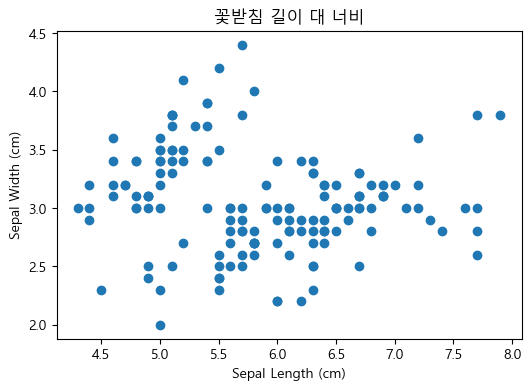

In [15]:
ax = plt.axes()

ax.scatter(data.sepal_length, data.sepal_width)

ax.set(xlabel='Sepal Length (cm)',
       ylabel='Sepal Width (cm)',
       title='꽃받침 길이 대 너비');

## Histogram plotting
matplotlib 으로 히스토그램을 만듭니다. 축에 레이블을 지정하고 적절한 제목을 붙입니다.

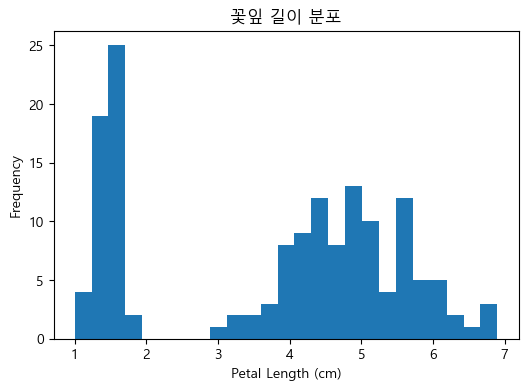

In [16]:
ax = plt.axes()
ax.hist(data.petal_length, bins=25);

ax.set(xlabel='Petal Length (cm)', 
       ylabel='Frequency',
       title='꽃잎 길이 분포');

동일한 플롯을 Pandas의 플로팅 기능을 사용합니다.

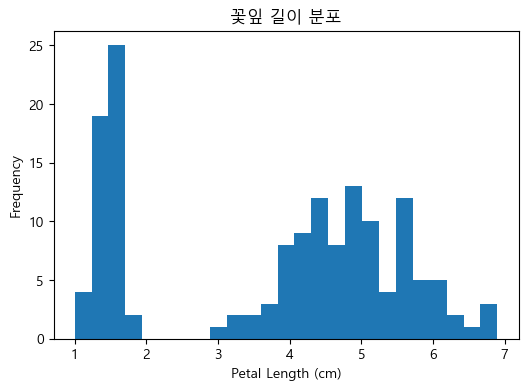

In [17]:
ax = data.petal_length.plot.hist(bins=25)

ax.set(xlabel='Petal Length (cm)', 
       ylabel='Frequency',
       title='꽃잎 길이 분포');

- 각 특성(`꽃잎 폭`, `꽃잎 길이`, `꽃받침 폭`, `꽃받침 길이`)에 대한 히스토그램이 오버레이된 단일 플롯을 생성합니다.   


- 각 특성별로 별도의 플롯을 생성합니다. 

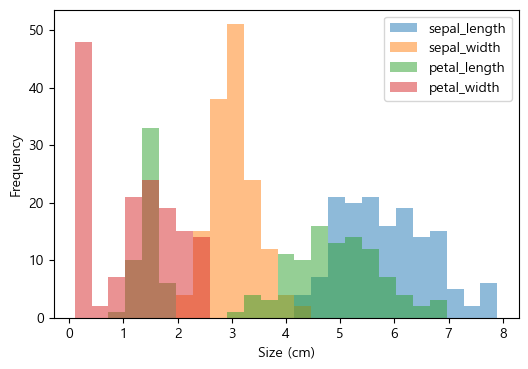

In [18]:
ax = data.plot.hist(bins=25, alpha=0.5)
ax.set_xlabel('Size (cm)');

DataFrame 전체에 `.hist()` 메서드를 사용하면 각 column 별로 4개의 개별 플롯이 생성되며 matplotlib.AxesSubplot의 배열을 반환합니다.

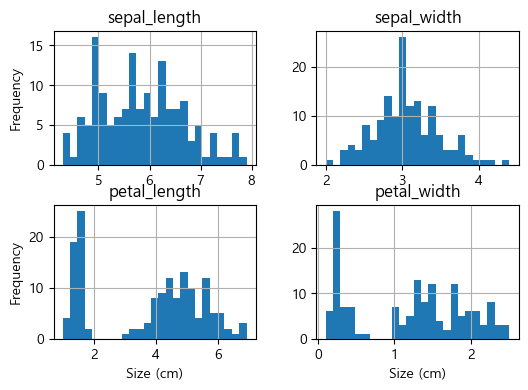

In [19]:
axList = data.hist(bins=25)

# 첫 번째 열과 마지막 행에 X 및 Y 레이블을 추가합니다.
for ax in axList.flatten():
    if ax.get_subplotspec().is_last_row():
        ax.set_xlabel('Size (cm)')
        
    if ax.get_subplotspec().is_first_col():
        ax.set_ylabel('Frequency')
        
plt.show()

먼저 각 열에 측정값이 하나만 있도록 데이터를 재구성 합니다.  
1. `species`를 index로 지정 합니다.  
2. 나머지 열을 하나의 행으로 쌓은 series를 생성합니다.
3. series를 DataFrame으로 변환합니다.  
4. index를 reset 합니다.  
5. 자동 생성된 column 명을 사용자 친화적으로 변경합니다. 

In [20]:
data.set_index('species').stack().to_frame().reset_index()

,species,level_1,0
0,setosa,sepal_length,5.1
1,setosa,sepal_width,3.5
2,setosa,petal_length,1.4
3,setosa,petal_width,0.2
4,setosa,sepal_length,4.9
...,...,...,...
595,virginica,petal_width,2.3
596,virginica,sepal_length,5.9
597,virginica,sepal_width,3.0
598,virginica,petal_length,5.1


In [21]:
plot_data = (data
             .set_index('species')
             .stack()
             .to_frame()
             .reset_index()
             .rename(columns={0:'size', 'level_1':'measurement'})
            )

plot_data.head()

,species,measurement,size
0,setosa,sepal_length,5.1
1,setosa,sepal_width,3.5
2,setosa,petal_length,1.4
3,setosa,petal_width,0.2
4,setosa,sepal_length,4.9


이제 Seaborn을 사용하여 위 데이터 프레임을 플로팅합니다.  
하나의 플롯에 4개의 변수별, 붓꽃 종별로 상자 수염 그림을 그릴 수 있고 각 변수와 종간의 관계를 한 눈에 파악할 수 있습니다.

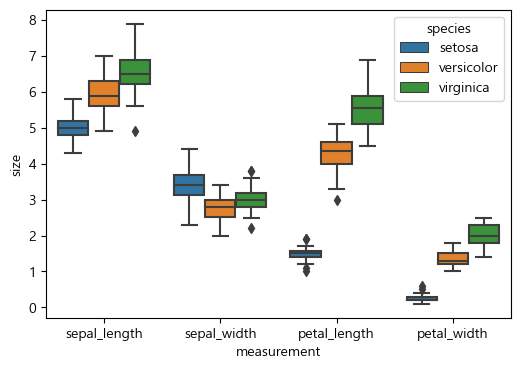

In [22]:
f = plt.figure(figsize=(6,4))
sns.boxplot(x='measurement', y='size', 
            hue='species', data=plot_data);

## Pair Plot
Seaborn을 사용하여 [페어플롯](http://seaborn.pydata.org/generated/seaborn.pairplot.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01)을 만들어 각 측정값 간의 상관관계를 조사합니다.

이 플롯은 복잡해 보이지만 실제로는 한 줄의 코드에 불과합니다. 

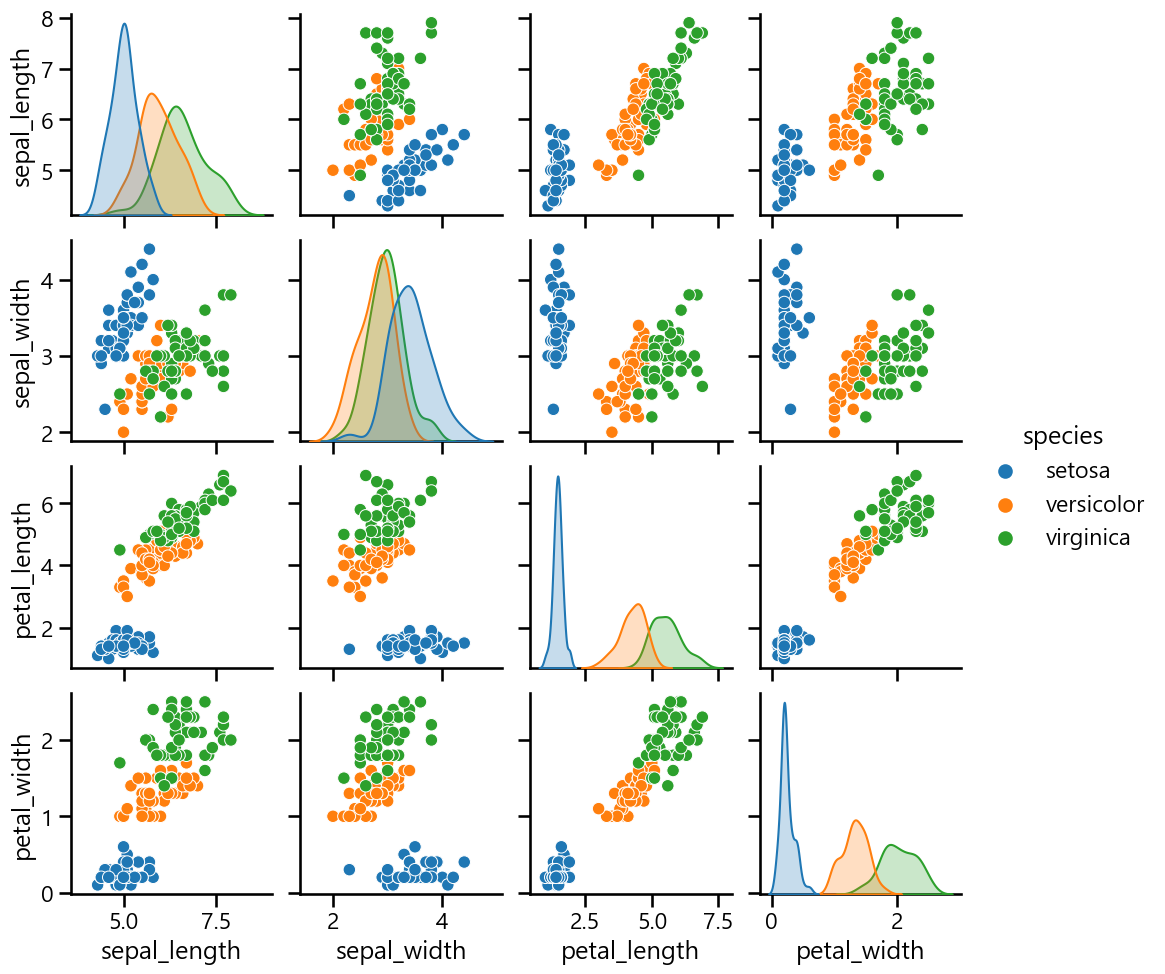

In [23]:
sns.set_context('talk')
sns.pairplot(data, hue='species');